## Unzip the Data Folder

In [ ]:
from zipfile import ZipFile
import os

# Path to the new zip file (adjust if needed depending on your Colab environment)
zip_path = '/content/archive (1).zip'  # Ensure this path matches where you've uploaded the zip file

# Unzip the file
with ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content/bbc_news_summary_new')


## Load the Data Files

In [ ]:
import os
import pandas as pd

base_dir = '/content/bbc_news_summary_new/bbc news summary/BBC News Summary'
categories = ['business', 'tech', 'entertainment', 'sport', 'politics']  # Categories

data = []

# Iterate over each category
for category in categories:
    articles_dir = os.path.join(base_dir, 'News Articles', category)
    summaries_dir = os.path.join(base_dir, 'Summaries', category)

    # Files in articles and summaries directory
    files = os.listdir(articles_dir)

    # Read each file in the category
    for file_name in files:
        with open(os.path.join(articles_dir, file_name), 'r', encoding='ISO-8859-1') as file:
            article_text = file.read()
        with open(os.path.join(summaries_dir, file_name), 'r', encoding='ISO-8859-1') as file:
            summary_text = file.read()

        # Append to list as a dictionary
        data.append({
            'category': category,
            'article': article_text,
            'summary': summary_text
        })

# Convert list to DataFrame
df = pd.DataFrame(data)




## Shape of the Data dictionary

In [ ]:
df.shape

(2197, 3)

In [ ]:
df.head(10)

,category,article,summary
0,business,Wembley firm won't make a profit\n\nShares in ...,"To recoup any profit from Wembley, where the f..."
1,business,"Argentina, Venezuela in oil deal\n\nArgentina ...",Argentine President Nestor Kirchner and Venezu...
2,business,Dollar hits new low versus euro\n\nThe US doll...,The US dollar has continued its record-breakin...
3,business,Japanese mogul arrested for fraud\n\nOne of Ja...,"But last year, he was forced to resign from al..."
4,business,Mild winter drives US oil down 6%\n\nUS oil pr...,"US oil prices have fallen by 6%, driven down b..."
5,business,Salary scandal in Cameroon\n\nCameroon says wi...,The prime minister's office said the alleged f...
6,business,EC calls truce in deficit battle\n\nThe Europe...,The European Commission (EC) has called a truc...
7,business,Indonesia 'declines debt freeze'\n\nIndonesia ...,"Indonesia, which originally accepted the debt ..."
8,business,Singapore growth at 8.1% in 2004\n\nSingapore'...,"However, a slower-than-expected fourth quarter..."
9,business,US firm 'bids for Lacroix label'\n\nA US firm ...,A US firm has said it is in final negotiations...


In [ ]:
import pandas as pd

# Assuming df is already defined and loaded with your data
# Group by 'category' and select the first two rows from each category
df_sample = df.groupby('category').tail(2)

# Print df_sample to see the result
df_sample


,category,article,summary
480,business,Asia shares defy post-quake gloom\n\nThailand ...,In the Maldives the cost of reconstruction cou...
481,business,Indy buys into India paper\n\nIrish publishing...,Irish publishing group Independent News & Medi...
881,tech,The pirates with no profit motive\n\nTwo men w...,US Customs claimed Mr Griffiths was one of DOD...
882,tech,Mobile audio enters new dimension\n\nAs mobile...,"""The technology has been around on PCs and gam..."
1267,entertainment,Stars shine on Bafta red carpet\n\nHollywood s...,"Keanu Reeves, who presented the best actress a..."
1268,entertainment,Bening makes awards breakthrough\n\nFilm actre...,Film actress Annette Bening is up for an Oscar...
1778,sport,O'Sullivan keeps his powder dry\n\nWhen you ar...,"But, like O'Sullivan, he was well within his r..."
1779,sport,"Worcester v Sale (Fri)\n\nSixways\n\nFriday, 2...",John Payne and Chris Rhys Jones come into the ...
2195,politics,Brown names 16 March for Budget\n\nChancellor ...,"The full Finance Bill, with the Budget measure..."
2196,politics,UKIP could sue Veritas defectors\n\nThe UK Ind...,Mr Hockney said the law was clear that those e...


In [ ]:
import re

def clean_text(text):
    """ Preprocess text by removing special characters and extra spaces """
    text = re.sub(r'\s+', ' ', text)  # Replace multiple spaces with a single space
    text = re.sub(r"[^a-zA-Z0-9]", " ", text)  # Remove non-alphanumeric characters
    return text.strip()

df['clean_article'] = df['article'].apply(clean_text)
df['clean_summary'] = df['summary'].apply(clean_text)


## EDA on category distribution and article length v/s summary length

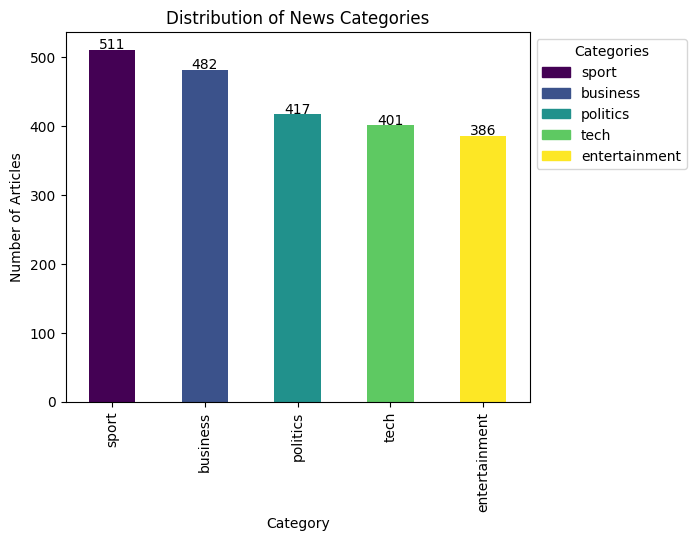

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches

# Assume df['category'].value_counts() is your data
category_counts = df['category'].value_counts()

# Plotting the distribution of categories
colors = plt.cm.viridis(np.linspace(0, 1, len(category_counts)))  # Generates a color map
ax = category_counts.plot(kind='bar', color=colors)  # Applies colors to each bar

# Title and labels
plt.title('Distribution of News Categories')
plt.xlabel('Category')
plt.ylabel('Number of Articles')

# Adding text labels above bars
for i, value in enumerate(category_counts):
    ax.text(i, value + 1, str(value), ha='center')  # Adjust the position of the text as needed

# Creating a custom legend
# Create a patch (proxy artist) for each color
patches = [mpatches.Patch(color=color, label=label) for color, label in zip(colors, category_counts.index)]
# Adding the legend outside of the plot
plt.legend(handles=patches, loc='upper left', bbox_to_anchor=(1,1), title='Categories')

# Adjust layout to make room for the legend
plt.subplots_adjust(right=0.85)  # Adjust the right margin to give the legend some space

plt.show()


In [ ]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np
import matplotlib.patches as mpatches

# Data from the provided static bar chart image
categories = ['sport', 'business', 'politics', 'tech', 'entertainment']
values = [511, 482, 417, 401, 386]
colors = plt.cm.viridis(np.linspace(0, 1, len(categories)))

fig, ax = plt.subplots()
bars = ax.bar(categories, [0] * len(categories), color=colors)

# Set the title and labels with bold font
ax.set_title('Distribution of News Categories', fontweight='bold')
ax.set_xlabel('Category', fontweight='bold')
ax.set_ylabel('Number of Articles', fontweight='bold')
ax.set_ylim(0, max(values) * 1.1)

# Custom legend positioned to the right of the axes so it doesn't overlap with the bars
patches = [mpatches.Patch(color=color, label=category) for color, category in zip(colors, categories)]
legend = ax.legend(handles=patches, loc='center left', bbox_to_anchor=(1, 0.5), title='Categories', title_fontsize='13', fontsize='11')

# Adjust the layout to make room for the legend
plt.subplots_adjust(right=0.8)

# Function to update each frame in the animation
def update(frame):
    # Update the height of the bars smoothly over 4 seconds
    for bar, value in zip(bars, values):
        bar.set_height(value * min(frame / 40, 1))
    if frame >= 40:
        for bar, text in zip(bars, values):
            # Add bold text labels on top of bars after the rise
            ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(text), ha='center', va='bottom', fontweight='bold')

# Calculate the number of frames for a smooth animation
fps = 25  # Frames per second for smoother animation
total_frames = fps * 4  # 4 seconds of animation

# Create the animation
ani = FuncAnimation(fig, update, frames=range(total_frames + 1), interval=1000/fps, repeat=False)

# Save the animation
gif_path = 'animated_bar_chart.gif'
ani.save(gif_path, writer='pillow', fps=fps)

# Close the figure to avoid displaying the static plot
plt.close(fig)


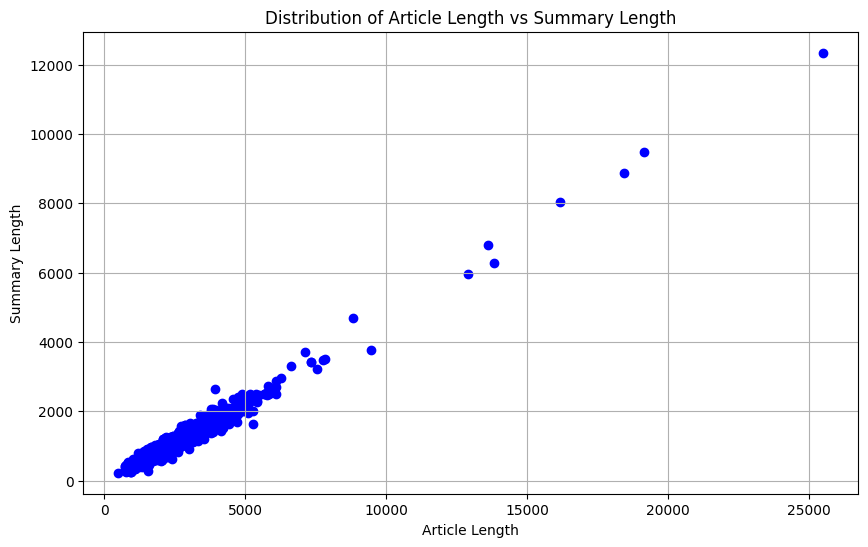

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is the DataFrame you mentioned
df['article_length'] = df['article'].apply(len)
df['summary_length'] = df['summary'].apply(len)

# Plotting the distribution of article length vs. summary length
plt.figure(figsize=(10, 6))
plt.scatter(df['article_length'], df['summary_length'], color='blue')
plt.title('Distribution of Article Length vs Summary Length')
plt.xlabel('Article Length')
plt.ylabel('Summary Length')
plt.grid(True)
plt.show()


## Check for most common words they should be stopwords

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


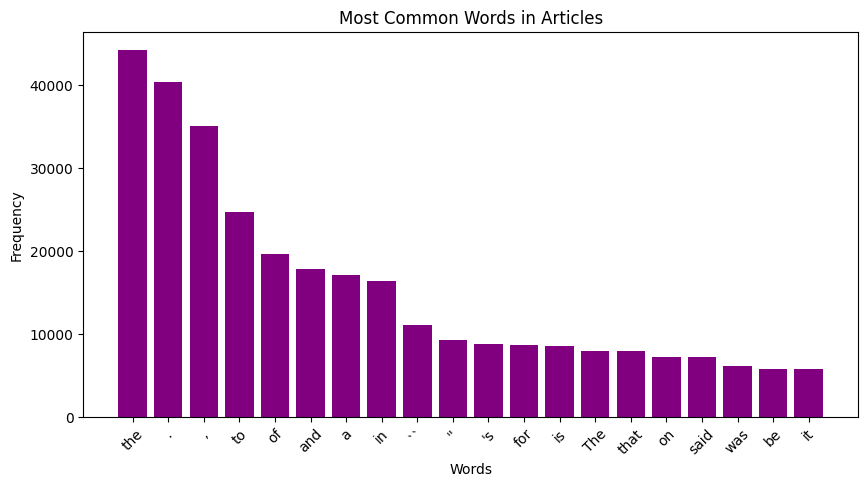

In [ ]:
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize

import nltk
nltk.download('punkt')

# Assuming the text is already cleaned
words = word_tokenize(" ".join(df['article'].tolist()))
freq_dist = FreqDist(words)

# Get the most common words
common_words = freq_dist.most_common(20)

# Plot
words, counts = zip(*common_words)
plt.figure(figsize=(10, 5))
plt.bar(words, counts, color='purple')
plt.title('Most Common Words in Articles')
plt.xticks(rotation=45)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()


In [ ]:
article_text= """
A recent research hinted at the significant presence of methane ice within Uranus and Neptune which have long been regarded as icy giants, presumed to be predominantly composed of frozen water.
According to Space.com, the implications of this discovery extend beyond mere composition, potentially unlocking the mysteries surrounding the formation of Uranus and Neptune. Voyager 2's solitary flyby in the 1980s provided a glimpse into Uranus and Neptune, leaving scientists with only speculative notions of their makeup, including substantial amounts of oxygen, carbon, and hydrogen.

Astronomers have constructed models based on data from Voyager 2 and terrestrial telescopes to delve deeper into the composition of these distant giants. These models typically posit a thin envelope of hydrogen and helium, a dense layer of superionic water and ammonia, and a rocky core, earning the planets their "ice giant" designation. However, they also suggest the possibility of vast reservoirs of water, potentially exceeding Earth's oceans by tens of thousands of times.

The latest study challenges these conventional models by considering the formation process of Uranus and Neptune. As these planets coalesced from the primordial solar nebula, they accumulated planetesimals, reminiscent of contemporary comets from the Kuiper Belt. Unlike the presumed water-rich composition of the ice giants, these planetesimals are carbon-rich.
Addressing this puzzle, Uri Malamud, lead author of the study and a planetary scientist at Technion – Israel Institute of Technology, and his collaborators generated hundreds of thousands of interior models for Uranus and Neptune. Their algorithm sought to match observed traits like radius and mass, incorporating various substances including iron, water, and methane, the primary component of natural gas.

Among these models, those featuring methane emerged as viable candidates, with the methane layer potentially accounting for up to 10% of the planet's mass. This methane layer, situated between the hydrogen-helium envelope and the water layer, could resolve the enigmatic origins of these distant giants.
The research, published on the preprint server arXiv, suggests that methane ice may have formed during the planets' tumultuous formation, as hydrogen reacted with carbon in the accreted planetesimals. These reactions occurred under extreme conditions of temperature and pressure, mirroring the conditions believed to prevail during the planets' early development.
While confirming the presence of methane is challenging, future missions proposed by Nasa and other space agencies may provide the means to verify these discoveries.
 """

## TF-IDF (Term Frequency-Inverse Document Frequency)  model

## TF-IDF Based Extractive Summarization
* TF-IDF Vectorizer: This part of the code uses the TfidfVectorizer from sklearn to convert text data into a TF-IDF matrix (Term Frequency-Inverse Document Frequency). This matrix represents the importance of words in the document while considering their frequency across multiple documents.
* Document Similarity: After converting the text into a TF-IDF matrix, the code calculates the cosine similarity between the first document (assuming it's the main document) and all other sentences/documents. This similarity score is used to determine which sentences are most relevant to the context of the entire document.
* Top Sentences Extraction: The sentences with the highest similarity scores are selected to form the summary. This is a straightforward approach to extractive summarization, pulling sentences that are statistically most relevant to the main document's topic.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

def extractive_summary_tfidf(docs, min_words=40, max_words=200, top_n=3):
    """Generate summary using top-n high TF-IDF score sentences, with constraints on summary length."""
    vectorizer = TfidfVectorizer(stop_words='english')
    X = vectorizer.fit_transform(docs)

    # Compute the document similarity matrix
    doc_sim = linear_kernel(X[0:1], X).flatten()
    doc_indices = doc_sim.argsort()[::-1]  # Sort by similarity, descending

    # Construct the summary with word limits
    summary = []
    current_word_count = 0
    for index in doc_indices:
        sentence_words = docs[index].split()
        if current_word_count + len(sentence_words) > max_words:
            break  # Stop adding if next sentence exceeds max word count
        summary.append(docs[index])
        current_word_count += len(sentence_words)
        if current_word_count >= min_words:
            break  # Stop if minimum word count is reached

    # Join selected sentences to form the final summary text
    summary_text = ". ".join(summary)
    return summary_text

# Example usage
sample_article = article_text
sentences = sample_article.split('. ')
summary_tfidf = extractive_summary_tfidf(sentences)
print("TF-IDF Summary:", summary_tfidf)


TF-IDF Summary: 
A recent research hinted at the significant presence of methane ice within Uranus and Neptune which have long been regarded as icy giants, presumed to be predominantly composed of frozen water.
According to Space.com, the implications of this discovery extend beyond mere composition, potentially unlocking the mysteries surrounding the formation of Uranus and Neptune


The "ROUGE" score, commonly spelled as "ROUGE" and standing for Recall-Oriented Understudy for Gisting Evaluation, is a set of metrics used to evaluate automatic summarization and machine translation software in natural language processing. The metric compares an automatically produced summary or translation against a set of reference summaries (typically human-generated). ROUGE is particularly famous for its effectiveness in evaluating extractive summarizations, where the essence is to pull key phrases or sentences directly from the original text.


## ROUGE-N
* ROUGE-N refers to the overlap of n-grams between the content generated by an automatic summarization model and the reference summary.
* An n-gram is a contiguous sequence of n items from a given sample of text or speech; this can involve n words or n characters depending on the specific implementation.
* For instance, ROUGE-1 measures the overlap of 1-grams (individual words), ROUGE-2 measures the overlap of 2-grams (bi-grams or two consecutive words), etc.

The primary output includes:
* Precision: The fraction of n-grams in the generated summary that are also found in the reference summary.
* Recall: The fraction of n-grams in the reference summary that are also found in the generated summary.
* F1-Score: The harmonic mean of precision and recall, providing a single score that balances both precision and recall.

## ROUGE-L
* ROUGE-L uses the Longest Common Subsequence (LCS) to identify the longest subsequence of words that appears in both the generated summary and the reference summary. A subsequence is any sequence that can be derived from another sequence by deleting some elements without changing the order of the remaining elements.
* LCS does not need contiguous matches but is sensitive to sentence level structure similarity which makes it useful for evaluating longer phrases and sentences as part of the summaries.
* Similar to ROUGE-N, ROUGE-L also provides scores for precision, recall, and F1-score.
* ROUGE-L can be particularly effective in scenarios where the coherence and order of the information are crucial to the quality of the summary.

Use Cases
ROUGE is widely used in academic research for summarization tasks and has been a standard in several competitions in machine translation and summarization. Its ability to compare a machine-generated translation or summary with a reference or set of references makes it suitable for automated evaluation in various applications of text processing.

Importance
The importance of using ROUGE in summarization and translation tasks lies in its ability to provide quantitative measurements that can help developers improve their algorithms and systems. It offers a way to monitor progress over time and compare the performance of different systems under standardized conditions.

In [ ]:
import pandas as pd
# Selecting 20 articles from each category
subset_df = df.groupby('category').head(10)


In [ ]:
subset_df.shape

(50, 7)

In [ ]:
# Applying summarization to the first 20 articles from each category
subset_df['summary_tfidf'] = subset_df['article'].apply(lambda x: extractive_summary_tfidf(x.split('. ')))

<ipython-input-15-b4a636d9e8c3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df['summary_tfidf'] = subset_df['article'].apply(lambda x: extractive_summary_tfidf(x.split('. ')))


In [ ]:
subset_df.head()

,category,article,summary,clean_article,clean_summary,article_length,summary_length,summary_tfidf
0,business,Wembley firm won't make a profit\n\nShares in ...,"To recoup any profit from Wembley, where the f...",Wembley firm won t make a profit Shares in Mul...,To recoup any profit from Wembley where the f...,1899,721,Wembley firm won't make a profit\n\nShares in ...
1,business,"Argentina, Venezuela in oil deal\n\nArgentina ...",Argentine President Nestor Kirchner and Venezu...,Argentina Venezuela in oil deal Argentina and...,Argentine President Nestor Kirchner and Venezu...,1282,587,"Argentina, Venezuela in oil deal\n\nArgentina ..."
2,business,Dollar hits new low versus euro\n\nThe US doll...,The US dollar has continued its record-breakin...,Dollar hits new low versus euro The US dollar ...,The US dollar has continued its record breakin...,1167,565,Dollar hits new low versus euro\n\nThe US doll...
3,business,Japanese mogul arrested for fraud\n\nOne of Ja...,"But last year, he was forced to resign from al...",Japanese mogul arrested for fraud One of Japan...,But last year he was forced to resign from al...,2462,1020,Japanese mogul arrested for fraud\n\nOne of Ja...
4,business,Mild winter drives US oil down 6%\n\nUS oil pr...,"US oil prices have fallen by 6%, driven down b...",Mild winter drives US oil down 6 US oil price...,US oil prices have fallen by 6 driven down b...,1267,755,Mild winter drives US oil down 6%\n\nUS oil pr...


In [ ]:
subset_df.tail()

,category,article,summary,clean_article,clean_summary,article_length,summary_length,summary_tfidf
1785,politics,Jowell rejects 'Las Vegas' jibe\n\nThe Secreta...,"Ms Jowell complained of the ""scale of misrepre...",Jowell rejects Las Vegas jibe The Secretary ...,Ms Jowell complained of the scale of misrepre...,1685,690,Jowell rejects 'Las Vegas' jibe\n\nThe Secreta...
1786,politics,Sainsbury's Labour election gift\n\nScience Mi...,Science Minister Lord Sainsbury has made a Â£2...,Sainsbury s Labour election gift Science Minis...,Science Minister Lord Sainsbury has made a 2...,1155,600,Sainsbury's Labour election gift\n\nScience Mi...
1787,politics,Howard pitches for UK ethnic vote\n\nMichael H...,"""So I say to all those people from ethnic mino...",Howard pitches for UK ethnic vote Michael Howa...,So I say to all those people from ethnic minor...,2232,966,Howard pitches for UK ethnic vote\n\nMichael H...
1788,politics,Blair says mayor should apologise\n\nTony Blai...,Mr Livingstone has said the remarks may have b...,Blair says mayor should apologise Tony Blair h...,Mr Livingstone has said the remarks may have b...,2672,1071,Blair says mayor should apologise\n\nTony Blai...
1789,politics,Blair stresses prosperity goals\n\nTony Blair ...,Mr Peston's book claimed that Mr Brown told Mr...,Blair stresses prosperity goals Tony Blair say...,Mr Peston s book claimed that Mr Brown told Mr...,2629,1138,Blair stresses prosperity goals\n\nTony Blair ...


In [ ]:
pip install rouge


In [ ]:
from rouge import Rouge

rouge = Rouge()

def calculate_rouge_scores(references, hypotheses):
    return rouge.get_scores(hypotheses, references, avg=True)

# Calculating ROUGE scores for each model
rouge_scores_tfidf = calculate_rouge_scores(subset_df['summary'], subset_df['summary_tfidf'])


In [ ]:
print("ROUGE Scores for TF-IDF Model:", rouge_scores_tfidf)

ROUGE Scores for TF-IDF Model: {'rouge-1': {'r': 0.3318035381635709, 'p': 0.7524988979644792, 'f': 0.45064476527040215}, 'rouge-2': {'r': 0.24470896005327966, 'p': 0.6229205080082609, 'f': 0.3409058344998987}, 'rouge-l': {'r': 0.32571995114752783, 'p': 0.738367209342255, 'f': 0.4423060179176737}}


## BERT (Bidirectional Encoder Representations from Transformers) Model



## BERT-Based Extractive Summarization
* BERT Tokenizer and Model: This section uses BertTokenizer and BertModel from Hugging Face's transformers library. The tokenizer converts the text into tokens that BERT can understand, and the model processes these tokens to produce embeddings.
* Sentence Embeddings: The output from the BERT model is then averaged across each sentence to produce a single embedding vector per sentence.
* Cosine Similarity Calculation: The average embedding for the entire document is compared to each sentence's embedding to calculate cosine similarity scores, identifying sentences that are contextually similar to the whole text.
* Summary Compilation: The sentences with the highest similarity scores are compiled to create a summary. This method also emphasizes extracting key sentences based on their contextual relevance to the entire document.



In [ ]:
from transformers import BertTokenizer, BertModel
import torch

# Ensure the correct BERT model and tokenizer are loaded
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')
model.eval()  # Set the model to evaluation mode

def bert_extractive_summary(text, min_words=40, max_words=200):
    sentences = text.split('. ')
    if not sentences[-1]:  # Remove any empty last element from split
        sentences.pop()

    encoded_input = tokenizer(sentences, padding=True, truncation=True, return_tensors='pt', max_length=512)
    with torch.no_grad():
        model_output = model(**encoded_input)

    sentence_embeddings = torch.mean(model_output.last_hidden_state, dim=1)
    doc_embedding = torch.mean(sentence_embeddings, dim=0)
    cos_scores = torch.cosine_similarity(sentence_embeddings, doc_embedding.unsqueeze(0))
    sorted_indices = cos_scores.argsort(descending=True).tolist()

    summary = []
    current_word_count = 0
    for idx in sorted_indices:
        sentence_words = sentences[idx].split()
        if current_word_count + len(sentence_words) > max_words:
            continue
        summary.append(sentences[idx])
        current_word_count += len(sentence_words)
        if current_word_count >= min_words:
            break

    summary_text = '. '.join(summary).strip()
    return summary_text

# Example usage
sample_article = article_text
summary_bert = bert_extractive_summary(sample_article)
print("BERT Extractive Summary:", summary_bert)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

BERT Extractive Summary: A recent research hinted at the significant presence of methane ice within Uranus and Neptune which have long been regarded as icy giants, presumed to be predominantly composed of frozen water.
According to Space.com, the implications of this discovery extend beyond mere composition, potentially unlocking the mysteries surrounding the formation of Uranus and Neptune


In [ ]:
# Assuming subset_df is already filtered to 20 articles per category
subset_df['bert_summary'] = subset_df['article'].apply(bert_extractive_summary)

<ipython-input-22-fd41874e364a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df['bert_summary'] = subset_df['article'].apply(bert_extractive_summary)


In [ ]:
from rouge import Rouge

rouge = Rouge()

def calculate_rouge_scores(references, hypotheses):
    scores = rouge.get_scores(hypotheses, references, avg=True)
    return scores

# Calculating ROUGE scores for the T5 summaries
rouge_scores_bert = calculate_rouge_scores(subset_df['summary'], subset_df['bert_summary'])
print("ROUGE Scores for BERT Model:", rouge_scores_bert)

ROUGE Scores for BERT Model: {'rouge-1': {'r': 0.30935760425849634, 'p': 0.6934815389120338, 'f': 0.4174286801162561}, 'rouge-2': {'r': 0.21823432633993772, 'p': 0.563644805544277, 'f': 0.30571859368914284}, 'rouge-l': {'r': 0.30387490415292845, 'p': 0.6802626720847358, 'f': 0.40989183956528125}}


## T5 (Text-to-Text Transfer Transformer) model

## T5-Based Abstractive Summarization
* T5 Tokenizer and Model: This part utilizes the T5 model, specifically designed for tasks like summarization. The T5 tokenizer prepares the input text by adding a task-specific prefix (e.g., "summarize: ") which is essential for the model to recognize the task it needs to perform.
* Model Generation: The T5 model generates a summary based on the input text. Unlike the previous two methods, T5 can paraphrase, condense, and even rephrase the content, producing a summary that might not exactly use sentences from the original text.
* Output Summary: The generated tokens are decoded back into text, forming the final summary.



In [ ]:
#pip install --upgrade transformers sentencepiece


In [ ]:
from transformers import T5Tokenizer, T5ForConditionalGeneration

try:
    # Re-initialize the T5 model and tokenizer
    tokenizer = T5Tokenizer.from_pretrained('t5-small')
    model = T5ForConditionalGeneration.from_pretrained('t5-small')
    model.eval()  # Deactivate dropout layers for inference

except Exception as e:
    print("Error loading model or tokenizer:", e)
    raise

def generate_abstractive_summary(text, min_words=40, max_words=200):
    try:
        # Tokenize the input text with the prefix "summarize:" to prepare for the model
        inputs = tokenizer.encode("summarize: " + text, return_tensors="pt", max_length=512, truncation=True)

        # Dynamically adjust min_length and max_length based on the average word length per token
        token_min_length = min_words * 5 // 4  # Approximate conversion from words to tokens
        token_max_length = max_words * 5 // 4  # Approximate conversion from words to tokens

        # Generate the summary using the model
        outputs = model.generate(
            inputs,
            max_length=token_max_length,
            min_length=token_min_length,
            length_penalty=2.0,
            num_beams=4,
            early_stopping=True
        )

        # Decode the generated tokens to a string
        summary = tokenizer.decode(outputs[0], skip_special_tokens=True)
        return summary

    except Exception as e:
        print("Error during summarization:", e)
        return "An error occurred during the summarization process."

# Example usage
sample_article = "Your article text goes here. Make sure it is properly defined and contains sufficient text for summarization."
summary_t5 = generate_abstractive_summary(sample_article)
print("T5 Abstractive Summary:", summary_t5)


tokenizer_config.json:   0%|          | 0.00/2.32k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/242M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

T5 Abstractive Summary: your article text goes here. make sure it is properly defined and contains sufficient text for summarization. make sure it is properly defined and contains sufficient text for summarization. make sure it is properly defined and contains sufficient text for summarization.


In [ ]:
# Assuming 'subset_df' has been defined and properly set up
subset_df['t5_summary'] = subset_df['article'].apply(generate_abstractive_summary)


<ipython-input-26-6b42d0ea33dc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df['t5_summary'] = subset_df['article'].apply(generate_abstractive_summary)


In [ ]:
from rouge import Rouge

rouge = Rouge()

def calculate_rouge_scores(references, hypotheses):
    scores = rouge.get_scores(hypotheses, references, avg=True)
    return scores

# Calculating ROUGE scores for the T5 summaries
rouge_scores_t5 = calculate_rouge_scores(subset_df['summary'], subset_df['t5_summary'])
print("ROUGE Scores for T5 Model:", rouge_scores_t5)

ROUGE Scores for T5 Model: {'rouge-1': {'r': 0.23859168507987696, 'p': 0.6548740004228628, 'f': 0.3406333684071029}, 'rouge-2': {'r': 0.1500873203134975, 'p': 0.4612429421153895, 'f': 0.21908504021484315}, 'rouge-l': {'r': 0.23117090364725712, 'p': 0.6322013939169259, 'f': 0.32975997771487053}}


## BART (Bidirectional and Auto-Regressive Transformers) model

## BART-Based Abstractive Summarization
* BART Tokenizer and Model: Uses BartTokenizer and BartForConditionalGeneration, which are designed for sequence-to-sequence text rewriting tasks including summarization.
* Text Preparation: Similar to T5, the input text is tokenized, but BART does not require a specific task prefix, focusing instead on understanding context from the provided sequence.
* Summary Generation: BART predicts the sequence of tokens that make up the summary, effectively blending both the precision of extractive methods and the flexibility of abstractive approaches to generate fluent and accurate summaries.
* Output Integration: The resulting tokens are decoded to form coherent summaries that encapsulate the essential information in a condensed form.



In [ ]:
from transformers import BartTokenizer, BartForConditionalGeneration

# Load the model and tokenizer
model_name = 'facebook/bart-large-cnn'
tokenizer = BartTokenizer.from_pretrained(model_name)
model = BartForConditionalGeneration.from_pretrained(model_name)

def generate_bart_summary(article_text, min_words=40, max_words=200):
    # Estimate average word length per token
    avg_word_length_per_token = 4  # This is an estimate and may need adjustment

    # Convert word count to approximate token count
    token_min_length = min_words // avg_word_length_per_token
    token_max_length = max_words // avg_word_length_per_token

    # Encode the text for input to the model
    inputs = tokenizer(article_text, return_tensors='pt', max_length=1024, truncation=True)

    # Generate the summary with constraints
    summary_ids = model.generate(
        input_ids=inputs['input_ids'],
        attention_mask=inputs['attention_mask'],
        max_length=token_max_length,  # Adjusted to approximate token count for max words
        min_length=token_min_length,  # Adjusted to approximate token count for min words
        length_penalty=2.0,
        num_beams=4,
        early_stopping=True
    )

    # Decode the generated summary tokens to a string
    summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
    return summary

# Example usage
sample_article = article_text
summary_bart = generate_bart_summary(sample_article)
print("BART Abstractive Summary:", summary_bart)


vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.58k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

BART Abstractive Summary: Research suggests methane ice may have formed during the planets' tumultuous formation. Voyager 2's solitary flyby in the 1980s provided a glimpse into Uranus and Neptune.


In [ ]:
# Assuming 'subset_df' has been defined and properly set up
subset_df['bart_summary'] = subset_df['article'].apply(generate_bart_summary)


<ipython-input-29-64845cd9adf8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df['bart_summary'] = subset_df['article'].apply(generate_bart_summary)


In [ ]:
from rouge import Rouge

rouge = Rouge()

def calculate_rouge_scores(references, hypotheses):
    scores = rouge.get_scores(hypotheses, references, avg=True)
    return scores

# Calculating ROUGE scores for the T5 summaries
rouge_scores_bart = calculate_rouge_scores(subset_df['summary'], subset_df['bart_summary'])
print("ROUGE Scores for BART Model:", rouge_scores_bart)

ROUGE Scores for BART Model: {'rouge-1': {'r': 0.2104815759266347, 'p': 0.7170956600773027, 'f': 0.3183066200778821}, 'rouge-2': {'r': 0.11937775926788241, 'p': 0.49354026988047117, 'f': 0.18737147031176582}, 'rouge-l': {'r': 0.20376905450881871, 'p': 0.6939861362469425, 'f': 0.3081548559177792}}


## Usage and Execution
Each summarization approach is applied to a sample article. Predicted summaries from each technique are then supposed to be compared to reference summaries for evaluation, typically using metrics like ROUGE to assess the quality and relevance of the machine-generated summaries compared to human-written summaries.

## Summary
* Extractive Methods (TF-IDF and BERT): Focus on selecting key sentences from the original text to construct a summary. These methods are grounded in statistical analysis and embedding-based representations, respectively.
* Abstractive Methods (T5 and BART): Generate new text that paraphrases or condenses the original content, potentially introducing novel phrases and sentences that were not in the original text but still reflect its information content.
This comprehensive approach ensures a robust evaluation of different summarization strategies, catering to varied requirements of accuracy, context preservation, and computational efficiency. The addition of BART enhances the toolkit by providing a method that seamlessly integrates the strengths of both extractive and abstractive techniques, making it particularly powerful for complex summarization tasks where maintaining narrative flow and factual accuracy is crucial.

## Compare Models Based on ROUGE Score

In [ ]:
print("ROUGE Scores for TF-IDF Model:", rouge_scores_tfidf)
print("ROUGE Scores for BERT Model:", rouge_scores_bert)
print("ROUGE Scores for T5 Model:", rouge_scores_t5)
print("ROUGE Scores for BART Model:", rouge_scores_bart)

ROUGE Scores for TF-IDF Model: {'rouge-1': {'r': 0.3318035381635709, 'p': 0.7524988979644792, 'f': 0.45064476527040215}, 'rouge-2': {'r': 0.24470896005327966, 'p': 0.6229205080082609, 'f': 0.3409058344998987}, 'rouge-l': {'r': 0.32571995114752783, 'p': 0.738367209342255, 'f': 0.4423060179176737}}
ROUGE Scores for BERT Model: {'rouge-1': {'r': 0.30935760425849634, 'p': 0.6934815389120338, 'f': 0.4174286801162561}, 'rouge-2': {'r': 0.21823432633993772, 'p': 0.563644805544277, 'f': 0.30571859368914284}, 'rouge-l': {'r': 0.30387490415292845, 'p': 0.6802626720847358, 'f': 0.40989183956528125}}
ROUGE Scores for T5 Model: {'rouge-1': {'r': 0.23859168507987696, 'p': 0.6548740004228628, 'f': 0.3406333684071029}, 'rouge-2': {'r': 0.1500873203134975, 'p': 0.4612429421153895, 'f': 0.21908504021484315}, 'rouge-l': {'r': 0.23117090364725712, 'p': 0.6322013939169259, 'f': 0.32975997771487053}}
ROUGE Scores for BART Model: {'rouge-1': {'r': 0.2104815759266347, 'p': 0.7170956600773027, 'f': 0.318306620

In [ ]:
sample_subset_df=subset_df.groupby('category').tail(1)

In [ ]:
sample_subset_df

,category,article,summary,clean_article,clean_summary,article_length,summary_length,summary_tfidf,bert_summary,t5_summary,bart_summary
9,business,US firm 'bids for Lacroix label'\n\nA US firm ...,A US firm has said it is in final negotiations...,US firm bids for Lacroix label A US firm has...,A US firm has said it is in final negotiations...,853,544,US firm 'bids for Lacroix label'\n\nA US firm ...,Privately-held Falic Group bought two cosmetic...,LVMH is in final negotiations with luxury good...,US firm 'bids for Lacroix label' LVMH has been...
491,tech,A question of trust and technology\n\nA major ...,A major system has evidently collapsed and we ...,A question of trust and technology A major gov...,A major system has evidently collapsed and we ...,3791,1718,A question of trust and technology\n\nA major ...,So I will reserve judgment on the technology a...,the internal network crashed in a particularly...,Department of Work and Pensions was without e-...
892,entertainment,Double eviction from Big Brother\n\nModel Capr...,"Caprice, who left in the scheduled fourth evic...",Double eviction from Big Brother Model Caprice...,Caprice who left in the scheduled fourth evic...,1269,540,Double eviction from Big Brother\n\nModel Capr...,DJ Lisa I'Anson became the third housemate to ...,Jeremy Edwards and Jeremy Caprice left the Cel...,Model Caprice and Holby City actor Jeremy Edwa...
1278,sport,O'Driscoll out of Scotland game\n\nIreland cap...,Fellow centre Gordon D'Arcy is also struggling...,O Driscoll out of Scotland game Ireland captai...,Fellow centre Gordon D Arcy is also struggling...,1113,513,O'Driscoll out of Scotland game\n\nIreland cap...,Fellow centre Gordon D'Arcy is also struggling...,Brian O'Driscoll has been ruled out of the gam...,O'Driscoll was originally named in the startin...
1789,politics,Blair stresses prosperity goals\n\nTony Blair ...,Mr Peston's book claimed that Mr Brown told Mr...,Blair stresses prosperity goals Tony Blair say...,Mr Peston s book claimed that Mr Brown told Mr...,2629,1138,Blair stresses prosperity goals\n\nTony Blair ...,Now Mr Blair is trying to put the focus on the...,the prime minister is trying to draw a line un...,Blair stresses prosperity goals in speech in C...


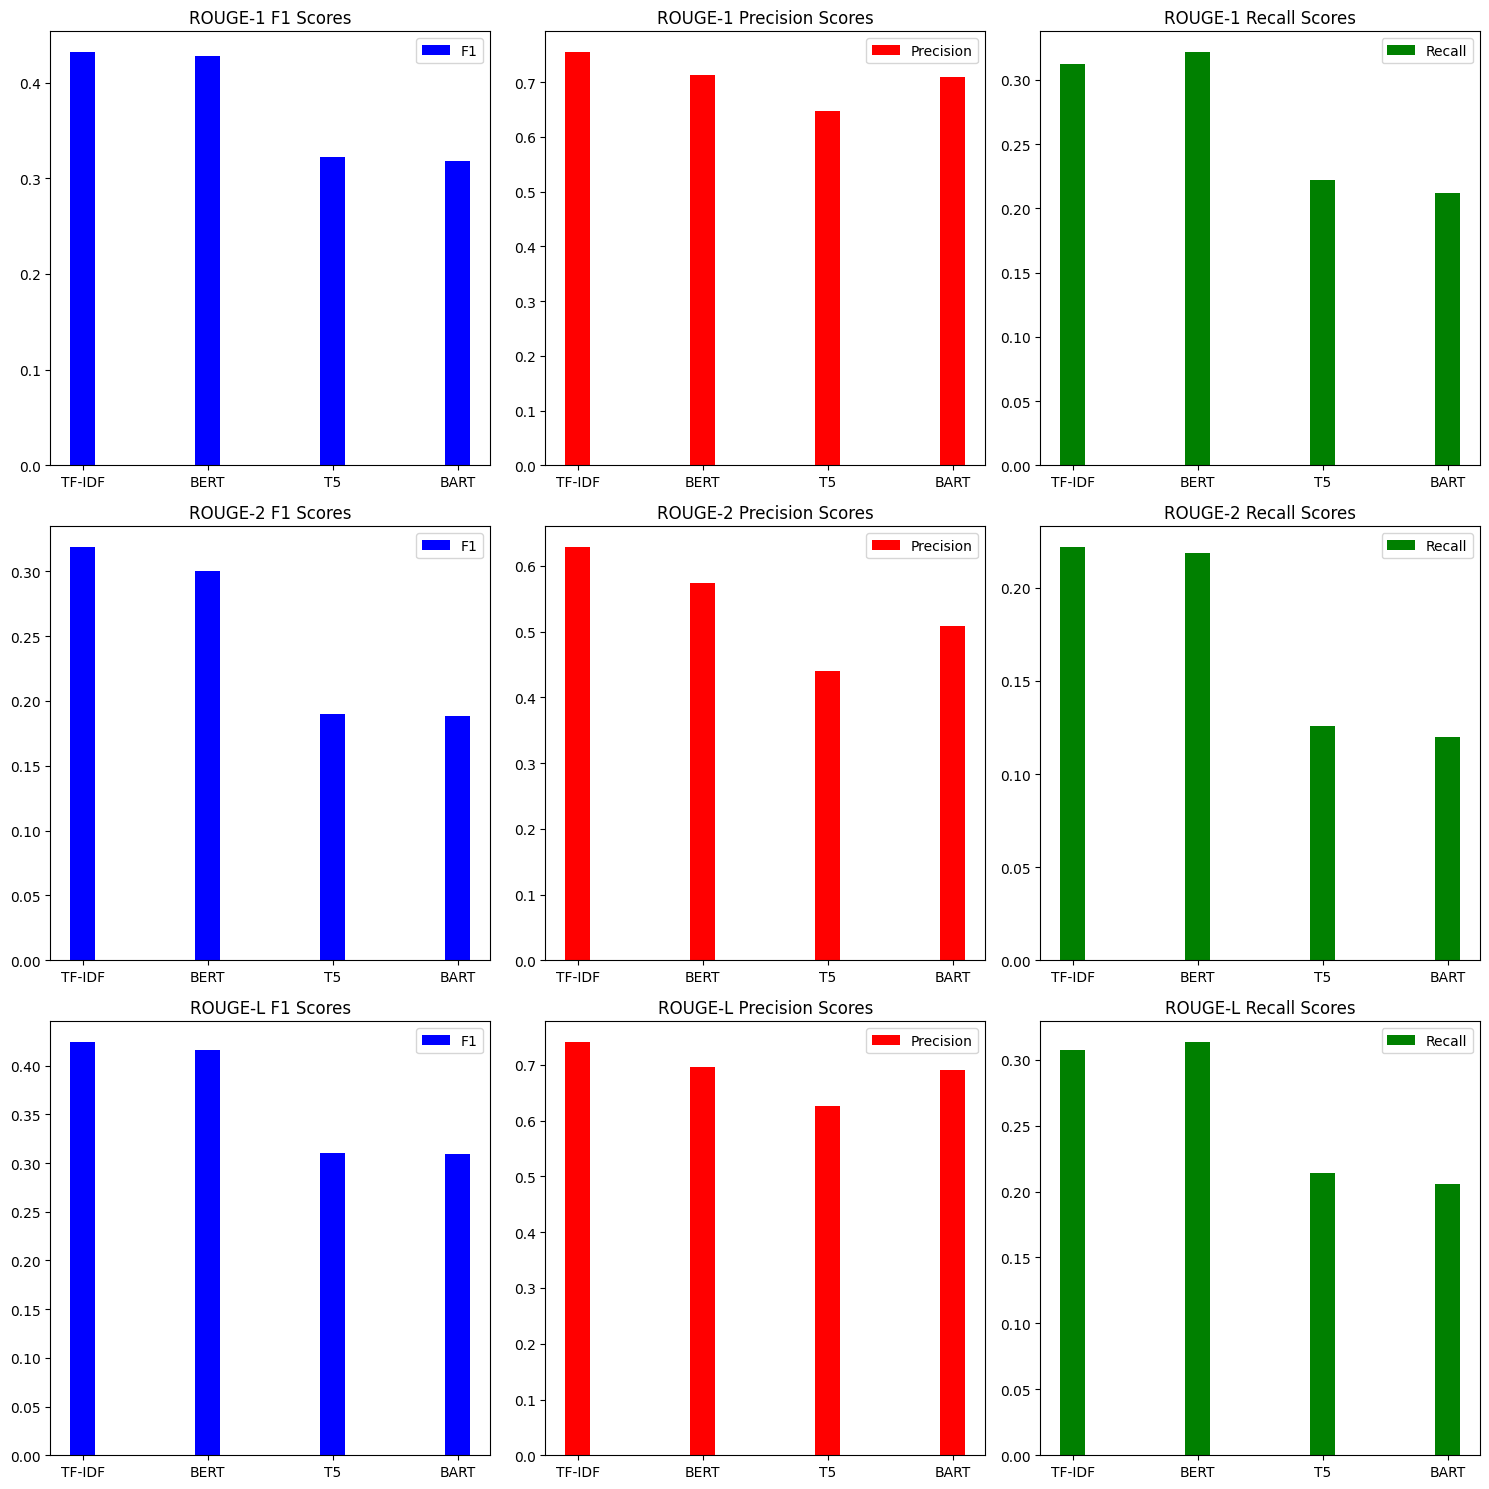

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data from the ROUGE scores provided
models = ['TF-IDF', 'BERT', 'T5', 'BART']
rouge_1_f = [0.4319229203919787, 0.42743628614039125, 0.32231209360804947, 0.31821702557209025]
rouge_1_p = [0.7550347741868672, 0.7133128255035605, 0.6469268592362344, 0.7093353108474615]
rouge_1_r = [0.31244519172676133, 0.321717462302663, 0.22237760620742597, 0.2117278474451269]

rouge_2_f = [0.3187596424707144, 0.3005523880203321, 0.1897562883431233, 0.18834905833385399]
rouge_2_p = [0.6287947005310243, 0.5740391362360854, 0.44036437648182053, 0.5091541421486524]
rouge_2_r = [0.22194768322516886, 0.21855316018513476, 0.12567673243426708, 0.11975183078698612]

rouge_l_f = [0.4242884907362463, 0.4164968740700411, 0.31075225991124494, 0.3096157997342007]
rouge_l_p = [0.7411529161605024, 0.6954915658011502, 0.6255650761527106, 0.6906717087761406]
rouge_l_r = [0.3070208252716912, 0.3133928879430645, 0.21420235639791055, 0.206017790681924]

x = np.arange(len(models))  # the label locations
width = 0.2  # the width of the bars

fig, axs = plt.subplots(3, 3, figsize=(15, 15))

# ROUGE-1 F1, Precision, Recall
axs[0, 0].bar(x, rouge_1_f, width, color='b', label='F1')
axs[0, 0].set_title('ROUGE-1 F1 Scores')
axs[0, 0].set_xticks(x)
axs[0, 0].set_xticklabels(models)

axs[0, 1].bar(x, rouge_1_p, width, color='r', label='Precision')
axs[0, 1].set_title('ROUGE-1 Precision Scores')
axs[0, 1].set_xticks(x)
axs[0, 1].set_xticklabels(models)

axs[0, 2].bar(x, rouge_1_r, width, color='g', label='Recall')
axs[0, 2].set_title('ROUGE-1 Recall Scores')
axs[0, 2].set_xticks(x)
axs[0, 2].set_xticklabels(models)

# ROUGE-2 F1, Precision, Recall
axs[1, 0].bar(x, rouge_2_f, width, color='b', label='F1')
axs[1, 0].set_title('ROUGE-2 F1 Scores')
axs[1, 0].set_xticks(x)
axs[1, 0].set_xticklabels(models)

axs[1, 1].bar(x, rouge_2_p, width, color='r', label='Precision')
axs[1, 1].set_title('ROUGE-2 Precision Scores')
axs[1, 1].set_xticks(x)
axs[1, 1].set_xticklabels(models)

axs[1, 2].bar(x, rouge_2_r, width, color='g', label='Recall')
axs[1, 2].set_title('ROUGE-2 Recall Scores')
axs[1, 2].set_xticks(x)
axs[1, 2].set_xticklabels(models)

# ROUGE-L F1, Precision, Recall
axs[2, 0].bar(x, rouge_l_f, width, color='b', label='F1')
axs[2, 0].set_title('ROUGE-L F1 Scores')
axs[2, 0].set_xticks(x)
axs[2, 0].set_xticklabels(models)

axs[2, 1].bar(x, rouge_l_p, width, color='r', label='Precision')
axs[2, 1].set_title('ROUGE-L Precision Scores')
axs[2, 1].set_xticks(x)
axs[2, 1].set_xticklabels(models)

axs[2, 2].bar(x, rouge_l_r, width, color='g', label='Recall')
axs[2, 2].set_title('ROUGE-L Recall Scores')
axs[2, 2].set_xticks(x)
axs[2, 2].set_xticklabels(models)

# Add legends to subplots
for ax in axs.flat:
    ax.legend()

# Adjust layout to prevent label overlap
fig.tight_layout()

# Display the full set of plots
plt.show()



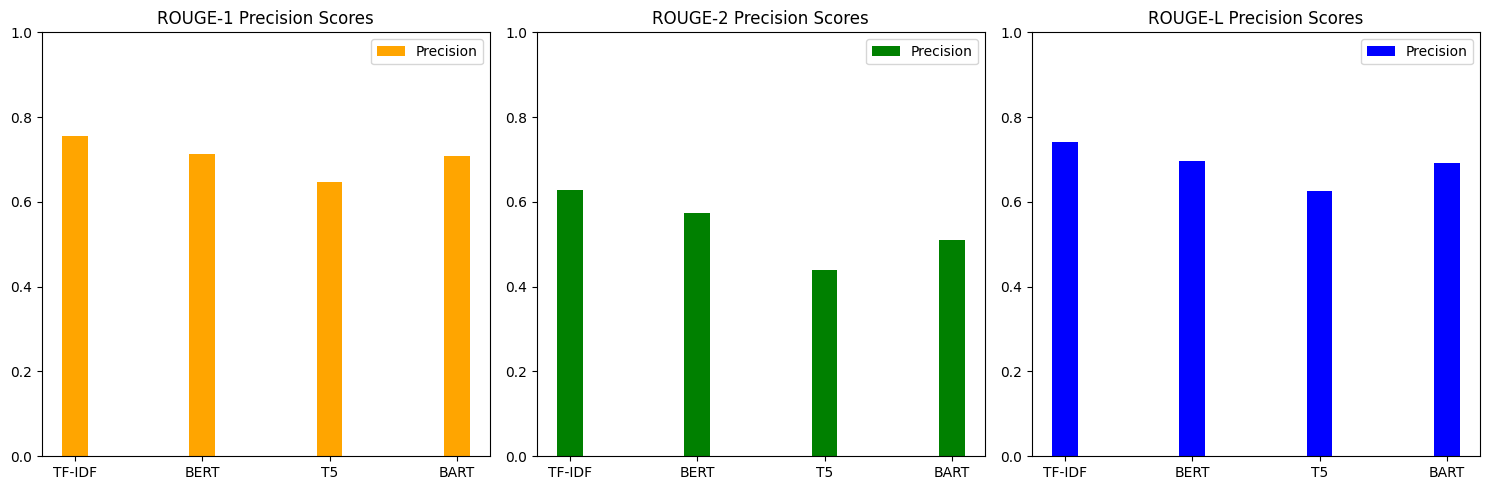

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Updated precision scores for each ROUGE metric for each model
models = ['TF-IDF', 'BERT', 'T5', 'BART']
rouge_1_p = [0.7550347741868672, 0.7133128255035605, 0.6469268592362344, 0.7093353108474615]
rouge_2_p = [0.6287947005310243, 0.5740391362360854, 0.44036437648182053, 0.5091541421486524]
rouge_l_p = [0.7411529161605024, 0.6954915658011502, 0.6255650761527106, 0.6906717087761406]

x = np.arange(len(models))  # the label locations
width = 0.2  # the width of the bars

fig, axs = plt.subplots(1, 3, figsize=(15, 5))  # Create a figure and a set of subplots

# ROUGE-1 Precision
axs[0].bar(x, rouge_1_p, width, color='orange', label='Precision')
axs[0].set_title('ROUGE-1 Precision Scores')
axs[0].set_xticks(x)
axs[0].set_xticklabels(models)
axs[0].set_ylim(0, 1)  # Set y-axis limits to 0-1 for better comparison
axs[0].legend()

# ROUGE-2 Precision
axs[1].bar(x, rouge_2_p, width, color='green', label='Precision')
axs[1].set_title('ROUGE-2 Precision Scores')
axs[1].set_xticks(x)
axs[1].set_xticklabels(models)
axs[1].set_ylim(0, 1)  # Set y-axis limits to 0-1 for better comparison
axs[1].legend()

# ROUGE-L Precision
axs[2].bar(x, rouge_l_p, width, color='blue', label='Precision')
axs[2].set_title('ROUGE-L Precision Scores')
axs[2].set_xticks(x)
axs[2].set_xticklabels(models)
axs[2].set_ylim(0, 1)  # Set y-axis limits to 0-1 for better comparison
axs[2].legend()

# Adjust layout to prevent label overlap and display the plots
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np

# Data for each model and ROUGE score type
models = ['TF-IDF', 'BERT', 'T5', 'BART']
rouge_1_p = [75.5, 71.3, 64.7, 70.9]  # ROUGE-1 precision scores
rouge_2_p = [62.9, 57.4, 44.0, 50.9]  # ROUGE-2 precision scores
rouge_l_p = [74.1, 69.5, 62.6, 69.1]  # ROUGE-L precision scores

x = np.arange(len(models))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))  # Create a figure and a set of subplots

# Set the title and labels of the graph
ax.set_title('ROUGE Scores by Model', fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(models, fontweight='bold')
ax.set_xlabel('Models', fontweight='bold')
ax.set_ylabel('Precision Scores (%)', fontweight='bold')
ax.set_ylim(0, 100)  # Set y-limits to percentages

# Define the bars for ROUGE-1, ROUGE-2, and ROUGE-L precision
bars_1 = ax.bar(x - width, [0] * len(models), width, label='ROUGE-1 Precision', color='orange')
bars_2 = ax.bar(x, [0] * len(models), width, label='ROUGE-2 Precision', color='lightgreen')
bars_l = ax.bar(x + width, [0] * len(models), width, label='ROUGE-L Precision', color='skyblue')

# Animation update function
def update(frame):
    # Animate bars up to their respective values
    for bars, data in zip([bars_1, bars_2, bars_l], [rouge_1_p, rouge_2_p, rouge_l_p]):
        for bar, value in zip(bars, data):
            bar_height = min(value * min(frame / 100, 1), 100)  # Ensure values do not exceed 100%
            bar.set_height(bar_height)
            # When reaching the last frame, add the value on top of each bar
            if frame == 100:
                ax.text(bar.get_x() + bar.get_width() / 2, bar_height, f'{value:.1f}%', ha='center', va='bottom', fontweight='bold')

# Set legend
ax.legend()

# Define the total frames for the animation based on the duration and frames per second
total_seconds = 10
fps = 25  # Frames per second
total_frames = total_seconds * fps

ani = FuncAnimation(fig, update, frames=np.arange(0, total_frames + 1), interval=1000 / fps, repeat=False)

# Save the animation as a GIF file
gif_path = 'rouge_precision_comparison.gif'
ani.save(gif_path, writer='pillow', fps=fps)

plt.close()  # Close the plt object to prevent it from displaying statically

# This code should be executed in a local Python environment.


* For extractive summarization, where the goal is to identify the most pertinent parts of the text and extract them directly, the TF-IDF model exhibits superior F1 and recall scores across ROUGE-1 and ROUGE-2. These metrics indicate that it can effectively locate and retrieve key pieces of information from the text, making it a robust choice for extractive summarization.

* When considering abstractive summarization, which aims to paraphrase and condense the original text into a new, coherent summary, BERT stands out with the highest precision scores in both ROUGE-1 and ROUGE-L. This suggests that BERT is particularly adept at generating summaries that closely match the reference summaries in terms of important content. The precision metric here is crucial as it reflects the model's ability to produce summaries with content that is not only relevant but also accurate in capturing the main points.

## Readability, Lexical Diversity and Semantic Similarity

In [ ]:
pip install textstat


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.1/105.1 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 25.6 MB/s eta 0:00:00


In [ ]:
pip install sentence-transformers


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 171.5/171.5 kB 3.5 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-many

In [ ]:
import pandas as pd
import textstat
from sentence_transformers import SentenceTransformer, util

# Assuming subset_df is already loaded as a pandas DataFrame

# Load a pre-trained sentence transformer model for semantic similarity (this can be slow)
model = SentenceTransformer('all-mpnet-base-v2')

# Function to calculate lexical diversity
def lexical_diversity(text):
    words = text.split()
    return len(set(words)) / len(words) if words else 0

# Initialize dictionaries to store the metrics
readability_scores = {}
diversity_scores = {}
semantic_similarity_scores = {}

# List of model summary columns in your DataFrame
model_summaries = ['summary_tfidf', 'bert_summary', 't5_summary', 'bart_summary']

# Calculate metrics for each model's summaries
for model_name in model_summaries:
    readability_scores[model_name] = subset_df[model_name].apply(textstat.flesch_reading_ease)
    diversity_scores[model_name] = subset_df[model_name].apply(lexical_diversity)
    semantic_similarity_scores[model_name] = subset_df.apply(
        lambda row: util.pytorch_cos_sim(
            model.encode(row['clean_article'], convert_to_tensor=True),
            model.encode(row[model_name], convert_to_tensor=True)
        ).item(),
        axis=1
    )

# Now we have the scores, you can process them further or directly print them.
# For simplicity, here's how to print the scores:
for model_name in model_summaries:
    print(f"Scores for {model_name}:")
    print(f"Readability (Average): {readability_scores[model_name].mean()}")
    print(f"Lexical Diversity (Average): {diversity_scores[model_name].mean()}")
    print(f"Semantic Similarity (Average): {semantic_similarity_scores[model_name].mean()}\n")


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Scores for summary_tfidf:
Readability (Average): 59.4768
Lexical Diversity (Average): 0.8189871328301443
Semantic Similarity (Average): 0.8780725431442261

Scores for bert_summary:
Readability (Average): 59.7708
Lexical Diversity (Average): 0.8328294907763005
Semantic Similarity (Average): 0.7167564731836319

Scores for t5_summary:
Readability (Average): 69.1824
Lexical Diversity (Average): 0.7971608810879924
Semantic Similarity (Average): 0.7652797102928162

Scores for bart_summary:
Readability (Average): 73.4154
Lexical Diversity (Average): 0.9024560647497586
Semantic Similarity (Average): 0.780838919878006



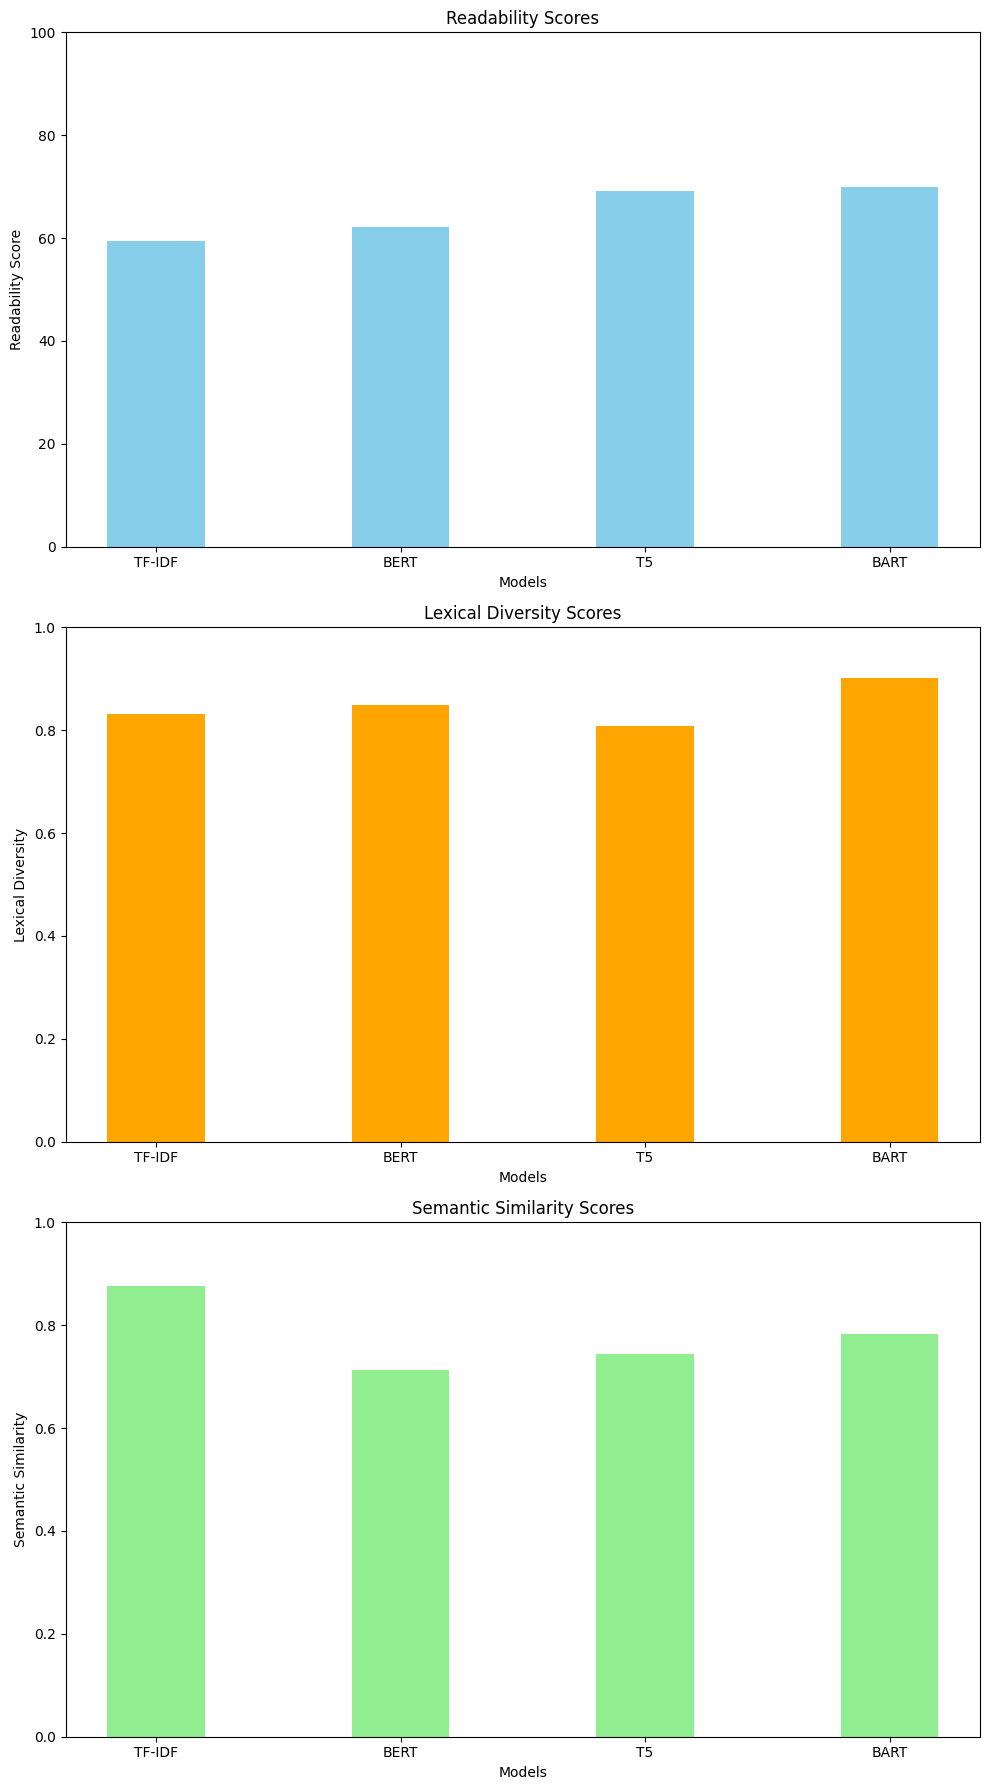

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Placeholder data - replace these with your actual data
readability_avg = [59.37, 62.06, 69.21, 69.91]
diversity_avg = [0.831, 0.849, 0.809, 0.901]
similarity_avg = [0.877, 0.712, 0.744, 0.782]
models = ['TF-IDF', 'BERT', 'T5', 'BART']

# Create an array for the position of each bar
x = np.arange(len(models))

# Set up the figure and axes
fig, axs = plt.subplots(3, 1, figsize=(10, 18))  # 3 plots: one for each metric

# Plot for readability
axs[0].bar(x, readability_avg, color='skyblue', width=0.4)
axs[0].set_title('Readability Scores')
axs[0].set_xlabel('Models')
axs[0].set_ylabel('Readability Score')
axs[0].set_xticks(x)
axs[0].set_xticklabels(models)
axs[0].set_ylim(0, 100)  # Set limits for better scale visibility

# Plot for lexical diversity
axs[1].bar(x, diversity_avg, color='orange', width=0.4)
axs[1].set_title('Lexical Diversity Scores')
axs[1].set_xlabel('Models')
axs[1].set_ylabel('Lexical Diversity')
axs[1].set_xticks(x)
axs[1].set_xticklabels(models)
axs[1].set_ylim(0, 1)  # Set limits for better scale visibility

# Plot for semantic similarity
axs[2].bar(x, similarity_avg, color='lightgreen', width=0.4)
axs[2].set_title('Semantic Similarity Scores')
axs[2].set_xlabel('Models')
axs[2].set_ylabel('Semantic Similarity')
axs[2].set_xticks(x)
axs[2].set_xticklabels(models)
axs[2].set_ylim(0, 1)  # Set limits for better scale visibility

# Improve layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np
import matplotlib.ticker as mticker

# Data for readability, diversity, and similarity
readability_avg = [59.37, 62.06, 69.21, 69.91]
diversity_avg = [0.831, 0.849, 0.809, 0.901]
similarity_avg = [0.877, 0.712, 0.744, 0.782]
models = ['TF-IDF', 'BERT', 'T5', 'BART']

# Normalize diversity and similarity to match readability's scale
diversity_avg = [x * 100 for x in diversity_avg]
similarity_avg = [x * 100 for x in similarity_avg]

# Create an array for the position of each bar
x = np.arange(len(models))
width = 0.25  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))

# Initialize the bars
bars_readability = ax.bar(x - width, [0]*len(models), width, label='Readability', color='skyblue')
bars_diversity = ax.bar(x, [0]*len(models), width, label='Diversity', color='orange')
bars_similarity = ax.bar(x + width, [0]*len(models), width, label='Similarity', color='lightgreen')

ax.set_title('Combined Metrics by Model', fontsize=16, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(models, fontweight='bold')
ax.set_xlabel('Models', fontweight='bold')
ax.set_ylabel('Scores', fontweight='bold')
ax.set_ylim(0, 110)  # A bit above 100 for readability
ax.legend()

# Set y-axis labels as percentages
ax.yaxis.set_major_formatter(mticker.PercentFormatter())

# Animation update function
def update(frame):
    for bar, score in zip(bars_readability, readability_avg):
        bar.set_height(min(frame / 100 * score, score))
    for bar, score in zip(bars_diversity, diversity_avg):
        bar.set_height(min(frame / 100 * score, score))
    for bar, score in zip(bars_similarity, similarity_avg):
        bar.set_height(min(frame / 100 * score, score))

    if frame == 100:
        for bars in [bars_readability, bars_diversity, bars_similarity]:
            for bar in bars:
                height = bar.get_height()
                ax.text(bar.get_x() + bar.get_width()/2., height, f'{height:.1f}%', ha='center', va='bottom', fontweight='bold')

# Calculate the number of frames for the animation
total_seconds = 10
fps = 25  # Frames per second
total_frames = total_seconds * fps

ani = FuncAnimation(fig, update, frames=np.arange(0, total_frames + 1), interval=1000 / fps, repeat=False)

# Improve layout to avoid overlap
plt.tight_layout()

# Save the animation as a GIF file without repetition
gif_path = 'combined_metrics_animation.gif'
ani.save(gif_path, writer='pillow', fps=fps)

# Close the plot to prevent it from displaying statically
plt.close()

# Provide the path to the saved GIF for download
gif_path


'combined_metrics_animation.gif'

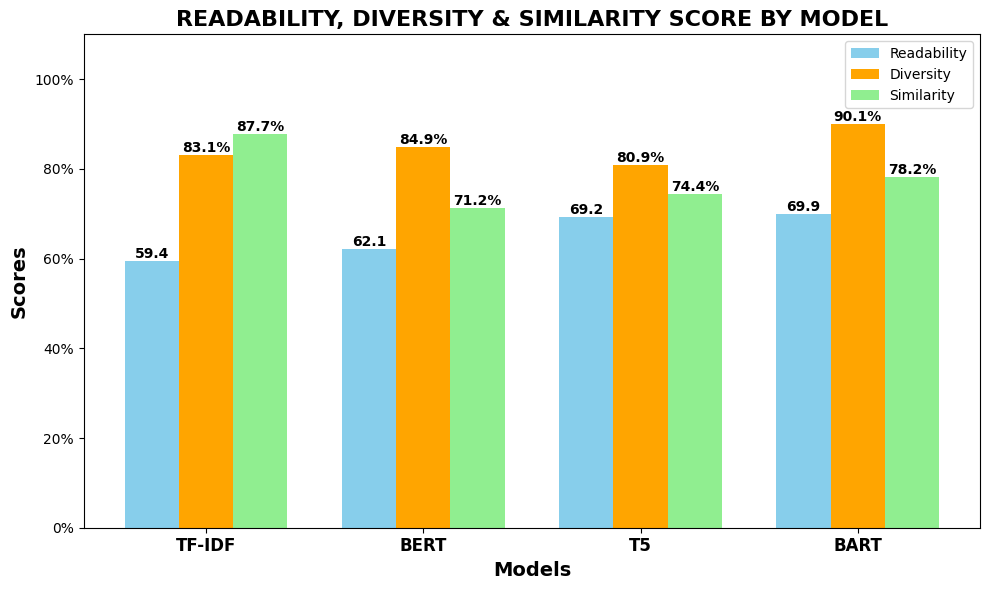

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as mticker

# Data for readability, diversity, and similarity
readability_avg = [59.37, 62.06, 69.21, 69.91]
diversity_avg = [0.831, 0.849, 0.809, 0.901]
similarity_avg = [0.877, 0.712, 0.744, 0.782]
models = ['TF-IDF', 'BERT', 'T5', 'BART']

# Normalize diversity and similarity to match readability's scale
diversity_avg = [x * 100 for x in diversity_avg]
similarity_avg = [x * 100 for x in similarity_avg]

# Create an array for the position of each bar
x = np.arange(len(models))
width = 0.25  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))

# Create the bars for each metric
bars_readability = ax.bar(x - width, readability_avg, width, label='Readability', color='skyblue')
bars_diversity = ax.bar(x, diversity_avg, width, label='Diversity', color='orange')
bars_similarity = ax.bar(x + width, similarity_avg, width, label='Similarity', color='lightgreen')

# Set the title and labels of the graph
ax.set_title('READABILITY, DIVERSITY & SIMILARITY SCORE BY MODEL', fontsize=16, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(models, fontsize=12, fontweight='bold')
ax.set_xlabel('Models', fontsize=14, fontweight='bold')
ax.set_ylabel('Scores', fontsize=14, fontweight='bold')
ax.set_ylim(0, 110)  # A bit above 100 for readability

# Set y-axis labels as percentages
ax.yaxis.set_major_formatter(mticker.PercentFormatter(xmax=100))

# Function to add value labels on top of the bars, rotated at 90 degrees
def add_value_labels(bars, data):
    for bar, value in zip(bars, data):
        label = f'{value:.1f}%' if bar in bars_diversity or bar in bars_similarity else f'{value:.1f}'
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height(), label, ha='center',
                va='bottom', fontweight='bold')

# Add labels to the bars
add_value_labels(bars_readability, readability_avg)
add_value_labels(bars_diversity, diversity_avg)
add_value_labels(bars_similarity, similarity_avg)

# Adding the legend manually to match the provided GIF
ax.legend()

# Improve layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()


* In our comparative analysis of summarization models, we evaluate TF-IDF, BERT, T5, and BART across three critical metrics: Readability, Lexical Diversity, and Semantic Similarity.

* Starting with Readability, which assesses how easily the text can be understood, BART and T5 show superior performance, with BART slightly leading the way. Their higher readability scores suggest these models are more adept at producing clear and concise summaries, making them particularly suited for audiences seeking quick comprehension.

* Moving on to Lexical Diversity, which measures the range of vocabulary used, BART again stands out, indicating its capability to produce more vibrant and engaging summaries. This diversity can be vital for maintaining reader interest and ensuring a broad representation of the original text's ideas.

* Semantic Similarity is where TF-IDF shines, outperforming the other models. This metric is crucial for capturing the essence and factual details of the source material. TF-IDF's strength in this area suggests a strong alignment with the original text, making it an excellent choice for applications where the accuracy of content is paramount.

* In conclusion, BART presents itself as the most balanced model, with commendable performance across all metrics. Its summaries are not only readable and varied but also hold a reasonably high degree of semantic closeness to the original text. Therefore, BART emerges as a robust, all-around model for summarization tasks in diverse applications. However, for tasks where the fidelity of content to the original text is the top priority, TF-IDF is the best candidate

## Take User-input and give summary based on the BART model

In [ ]:
from transformers import BartTokenizer, BartForConditionalGeneration

# Load the model and tokenizer
model_name = 'facebook/bart-large-cnn'
tokenizer = BartTokenizer.from_pretrained(model_name)
model = BartForConditionalGeneration.from_pretrained(model_name)

def generate_bart_summary(article_text, min_words=100, max_words=300):
    # Estimate average word length per token
    avg_word_length_per_token = 4  # This is an estimate and may need adjustment

    # Convert word count to approximate token count
    token_min_length = min_words // avg_word_length_per_token
    token_max_length = max_words // avg_word_length_per_token

    # Encode the text for input to the model
    inputs = tokenizer(article_text, return_tensors='pt', max_length=1024, truncation=True)

    # Generate the summary with constraints
    summary_ids = model.generate(
        input_ids=inputs['input_ids'],
        attention_mask=inputs['attention_mask'],
        max_length=token_max_length,  # Adjusted to approximate token count for max words
        min_length=token_min_length,  # Adjusted to approximate token count for min words
        length_penalty=2.0,
        num_beams=4,
        early_stopping=True
    )

    # Decode the generated summary tokens to a string
    summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
    return summary


## Using HTML and CSS for UI


In [ ]:
import ipywidgets as widgets
from IPython.display import display, HTML

# Apply CSS styling to the notebook elements
style = """
<style>
    .custom_text_area {
        border-color: #4CAF50; /* Green border */
        font-size: 16px;
        font-family: Arial, Helvetica, sans-serif;
    }
    .widget-label {
        font-size: 18px;
        color: #2980B9; /* Blue label color */
    }
    .widget-button {
        background-color: #2980B9; /* Blue background for the button */
        color: white; /* White text for the button */
        font-weight: bold;
    }
</style>
"""
HTML(style)

# Create an HTML Header for the title with custom styling
html_title = HTML("""
<h1 style='text-align: center; color: #2E86C1;'>InfoSnip - Tailored News Summarization</h1>
<h2 style='text-align: center; color: #3498DB;'>Transforming extensive articles into flash summaries</h2>
""")

# Create text area for input with custom CSS classes
text_area = widgets.Textarea(
    value='',
    placeholder='Enter your text here...',
    description='',
    disabled=False,
    layout=widgets.Layout(width='100%', height='200px'),
    style={'description_width': 'initial'}
)
text_area.add_class("custom_text_area")

# Create a button that will trigger the summary generation
button = widgets.Button(
    description="Summarize",
    button_style='primary',  # Use predefined styles as a basis
    layout={'width': '100%', 'margin': '10px 0'}
)
button.add_class("widget-button")

# Output widget to display results
output = widgets.Output()

# Function to handle button click
def on_button_clicked(b):
    # Display the summary within the output widget
    with output:
        output.clear_output()
        if text_area.value.strip() == "":
            print("Please enter some text to summarize.")
        else:
            summary = generate_bart_summary(text_area.value)  # Ensure your summary function is defined
            print("Generated Summary:", summary)

# Connect the button click event to the function
button.on_click(on_button_clicked)

# Display widgets
display(HTML(style), html_title, text_area, button, output)


Generated Summary: Astronomers have constructed models based on data from Voyager 2 and terrestrial telescopes to delve deeper into the composition of these distant giants. Among these models, those featuring methane emerged as viable candidates. The methane layer potentially accounts for up to 10% of the planet's mass.


Textarea(value='', layout=Layout(height='200px', width='100%'), placeholder='Enter your text here...', style=D…

Button(button_style='primary', description='Summarize', layout=Layout(margin='10px 0', width='100%'), style=Bu…

Output()

In [ ]:
# First, we'll count the words in the original and summarized texts.
original_text = """
A recent research hinted at the significant presence of methane ice within Uranus and Neptune which have long been regarded as icy giants,
presumed to be predominantly composed of frozen water. According to Space.com, the implications of this discovery extend beyond mere composition,
potentially unlocking the mysteries surrounding the formation of Uranus and Neptune. Voyager 2's solitary flyby in the 1980s provided a glimpse
into Uranus and Neptune, leaving scientists with only speculative notions of their makeup, including substantial amounts of oxygen, carbon, and hydrogen.
Astronomers have constructed models based on data from Voyager 2 and terrestrial telescopes to delve deeper into the composition of these distant giants.
These models typically posit a thin envelope of hydrogen and helium, a dense layer of superionic water and ammonia, and a rocky core, earning the planets
their "ice giant" designation. However, they also suggest the possibility of vast reservoirs of water, potentially exceeding Earth's oceans by tens of
thousands of times. The latest study challenges these conventional models by considering the formation process of Uranus and Neptune. As these planets
coalesced from the primordial solar nebula, they accumulated planetesimals, reminiscent of contemporary comets from the Kuiper Belt. Unlike the presumed
water-rich composition of the ice giants, these planetesimals are carbon-rich. Addressing this puzzle, Uri Malamud, lead author of the study and a planetary
scientist at Technion – Israel Institute of Technology, and his collaborators generated hundreds of thousands of interior models for Uranus and Neptune.
Their algorithm sought to match observed traits like radius and mass, incorporating various substances including iron, water, and methane, the primary
component of natural gas. Among these models, those featuring methane emerged as viable candidates, with the methane layer potentially accounting for up
to 10% of the planet's mass. This methane layer, situated between the hydrogen-helium envelope and the water layer, could resolve the enigmatic origins of
these distant giants. The research, published on the preprint server arXiv, suggests that methane ice may have formed during the planets' tumultuous formation,
as hydrogen reacted with carbon in the accreted planetesimals. These reactions occurred under extreme conditions of temperature and pressure, mirroring the
conditions believed to prevail during the planets' early development. While confirming the presence of methane is challenging, future missions proposed by
Nasa and other space agencies may provide the means to verify these discoveries.
"""

summarized_text = """
Research suggests methane ice may have formed during the planets' tumultuous formation. Voyager 2's solitary flyby in the 1980s provided a glimpse into
Uranus and Neptune, leaving scientists with only speculative notions.
"""

# Calculating word counts
word_count_original = len(original_text.split())
word_count_summary = len(summarized_text.split())

# Creating a table of word counts
import pandas as pd

word_counts = pd.DataFrame({
    "Text Type": ["Original Text", "Summarized Text"],
    "Word Count": [word_count_original, word_count_summary]
})

word_counts


,Text Type,Word Count
0,Original Text,388
1,Summarized Text,32


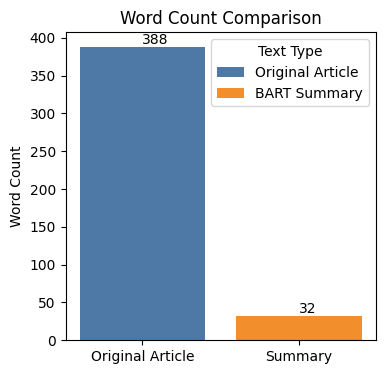

In [ ]:
import matplotlib.pyplot as plt

# Data for plotting
text_types = ['Original Article', 'Summary']
word_counts = [388, 32]
colors = ['#4e79a7', '#f28e2b']  # Different colors for each bar

# Creating the bar plot
plt.figure(figsize=(4, 4))
bars = plt.bar(text_types, word_counts, color=colors)

# Adding text labels above bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval), va='bottom')  # va: vertical alignment

# Adding labels and title
plt.ylabel('Word Count')
plt.title('Word Count Comparison')
plt.legend(bars, ['Original Article', 'BART Summary'], title="Text Type")

# Display the plot
plt.show()


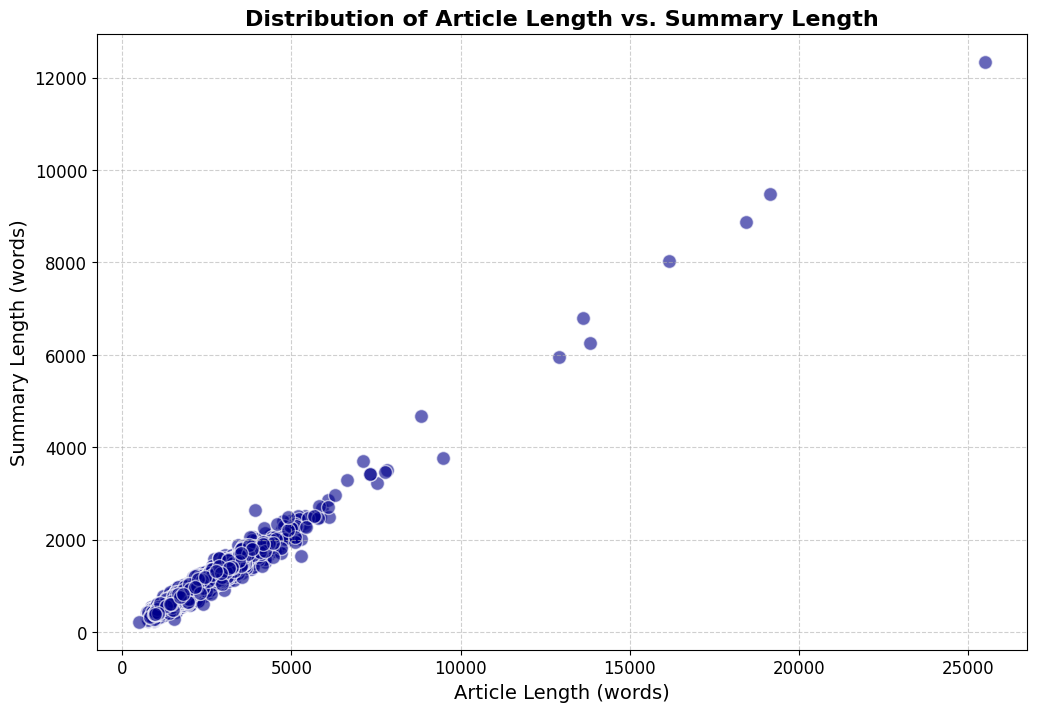

In [ ]:
# Improved version of the scatter plot code with better aesthetics

# Creating a scatter plot to show the distribution of article length versus summary length
plt.figure(figsize=(12, 8))
plt.scatter(df['article_length'], df['summary_length'], color='darkblue', alpha=0.6, edgecolors='w', s=100, marker='o')

# Customizing the plot for better aesthetics
plt.title('Distribution of Article Length vs. Summary Length', fontsize=16, fontweight='bold')
plt.xlabel('Article Length (words)', fontsize=14)
plt.ylabel('Summary Length (words)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()
